In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [4]:
class_names = ["Basalt", "chert", "Clay", "Conglomerate", "Diatomite", "gypsum", "olivine-basalt", "Shale-(Mudstone)", "Siliceous-sinter"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'Basalt': 0,
 'chert': 1,
 'Clay': 2,
 'Conglomerate': 3,
 'Diatomite': 4,
 'gypsum': 5,
 'olivine-basalt': 6,
 'Shale-(Mudstone)': 7,
 'Siliceous-sinter': 8}

In [5]:
IMAGE_SIZE = (320,320)
TRAIN_PATH = "C:\\Users\\inilo\\The_Bridge\\Iñigo\\Proyecto_ML_ClasificacionRocas\\src\\data\\archive\\Rock Data" + "\\train"
TEST_PATH = "C:\\Users\\inilo\\The_Bridge\\Iñigo\\Proyecto_ML_ClasificacionRocas\\src\\data\\archive\\Rock Data" + "\\test"
VALID_PATH = "C:\\Users\\inilo\\The_Bridge\\Iñigo\\Proyecto_ML_ClasificacionRocas\\src\\data\\archive\\Rock Data" + "\\valid"

In [6]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except:
                print("Error en lectura imagen", image_path)

    return np.array(X), np.array(y)

In [7]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3687, 320, 320, 3)
(174, 320, 320, 3)
(3687,)
(174,)


In [8]:
import random

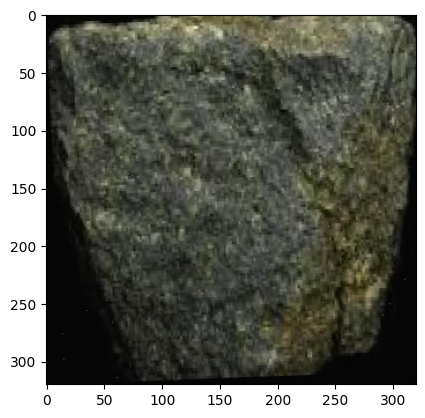

In [13]:
plt.imshow(X_train[random.randint(0,len(X_train))]);

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
# Modelo CNN

input_shape = (320, 320, 3)

layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9, activation='softmax')  # 9 clases
]

model = keras.Sequential(layers)

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
early_stop = EarlyStopping(patience=10)
checkpoint = ModelCheckpoint('best_model.keras')

In [20]:
X_val, y_val = read_data(VALID_PATH, IMAGE_SIZE)

In [21]:
print(X_val.shape)

(351, 320, 320, 3)


In [22]:
X_val = X_val / 255.0

In [23]:
X_val, y_val = shuffle(X_val, y_val, random_state=42)

In [24]:
history = model.fit(
    X_train,
    y_train, 
    batch_size=32,
    epochs=50,
    validation_data=(X_val,y_val),
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50
  6/116 [>.............................] - ETA: 6:16 - loss: 4.2183 - accuracy: 0.0833

KeyboardInterrupt: 